In [1]:
import time as time
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sorting import hybrid_sort, merge_sort, insertion_sort
from comparison_counter import ComparisonCounter

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(42)

# Testing the sorting algorithm

In [2]:
arr1 = [14, 40, 31, 28, 3, 15, 17, 51]
arr2 = [23, 23, 23, 23, 23, 23, 23, 23]

In [3]:
comparison_counter = ComparisonCounter()

print(merge_sort(deepcopy(arr1), comparison_counter))
assert comparison_counter.get_count() == 16

comparison_counter.reset_count()
print(merge_sort(deepcopy(arr2), comparison_counter))
assert comparison_counter.get_count() == 12

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


In [4]:
comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr1), comparison_counter, 4))
assert comparison_counter.get_count() >= 16

comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr2), comparison_counter, 4))
assert comparison_counter.get_count() == 10

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


# Input generation

In [5]:
sizes = [1000, 10000, 100000, 1000000, 10000000]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

for i in range(len(inputs)):
    print("Size: ", len(inputs[i]))
    print("Min value:", min(inputs[i]))
    print("Max value:", max(inputs[i]))
    print()

Size:  1000
Min value: 1
Max value: 999

Size:  10000
Min value: 2
Max value: 9999

Size:  100000
Min value: 2
Max value: 99998

Size:  1000000
Min value: 2
Max value: 1000000

Size:  10000000
Min value: 1
Max value: 9999999



# (c) iii: Determining Optimal S Values for Hybrid Sort

In [ ]:
# Initialising variables and setup for determining Optimal S
np.random.seed(42)
optS = 0
arrSize = range(0, 200)
mergeCompare = []
insertionCompare = []
mergeComparison = 0
insertComparison = 0

mergeCount = ComparisonCounter()
insertCount = ComparisonCounter()

for s in arrSize:
    arr = np.random.randint(10000, size=s)
    # A copy is created to ensure the same array is used for Insertion and Merge Sort
    arr2 = arr.copy()

    ## Merge Sort
    arr = merge_sort(arr, mergeCount)
    mergeComparison = mergeCount.get_count()
    mergeCount.reset_count()

    ## Insertion Sort
    arr2 = insertion_sort(arr2, insertCount)
    insertionComparison = insertCount.get_count()
    insertCount.reset_count()

    # Optimal S is defined as the cases when Insertion Sort use fewer key comparisons than Merge Sort,
    if insertionComparison < mergeComparison:
        optS = s

    mergeCompare.append(mergeComparison)
    insertionCompare.append(insertionComparison)

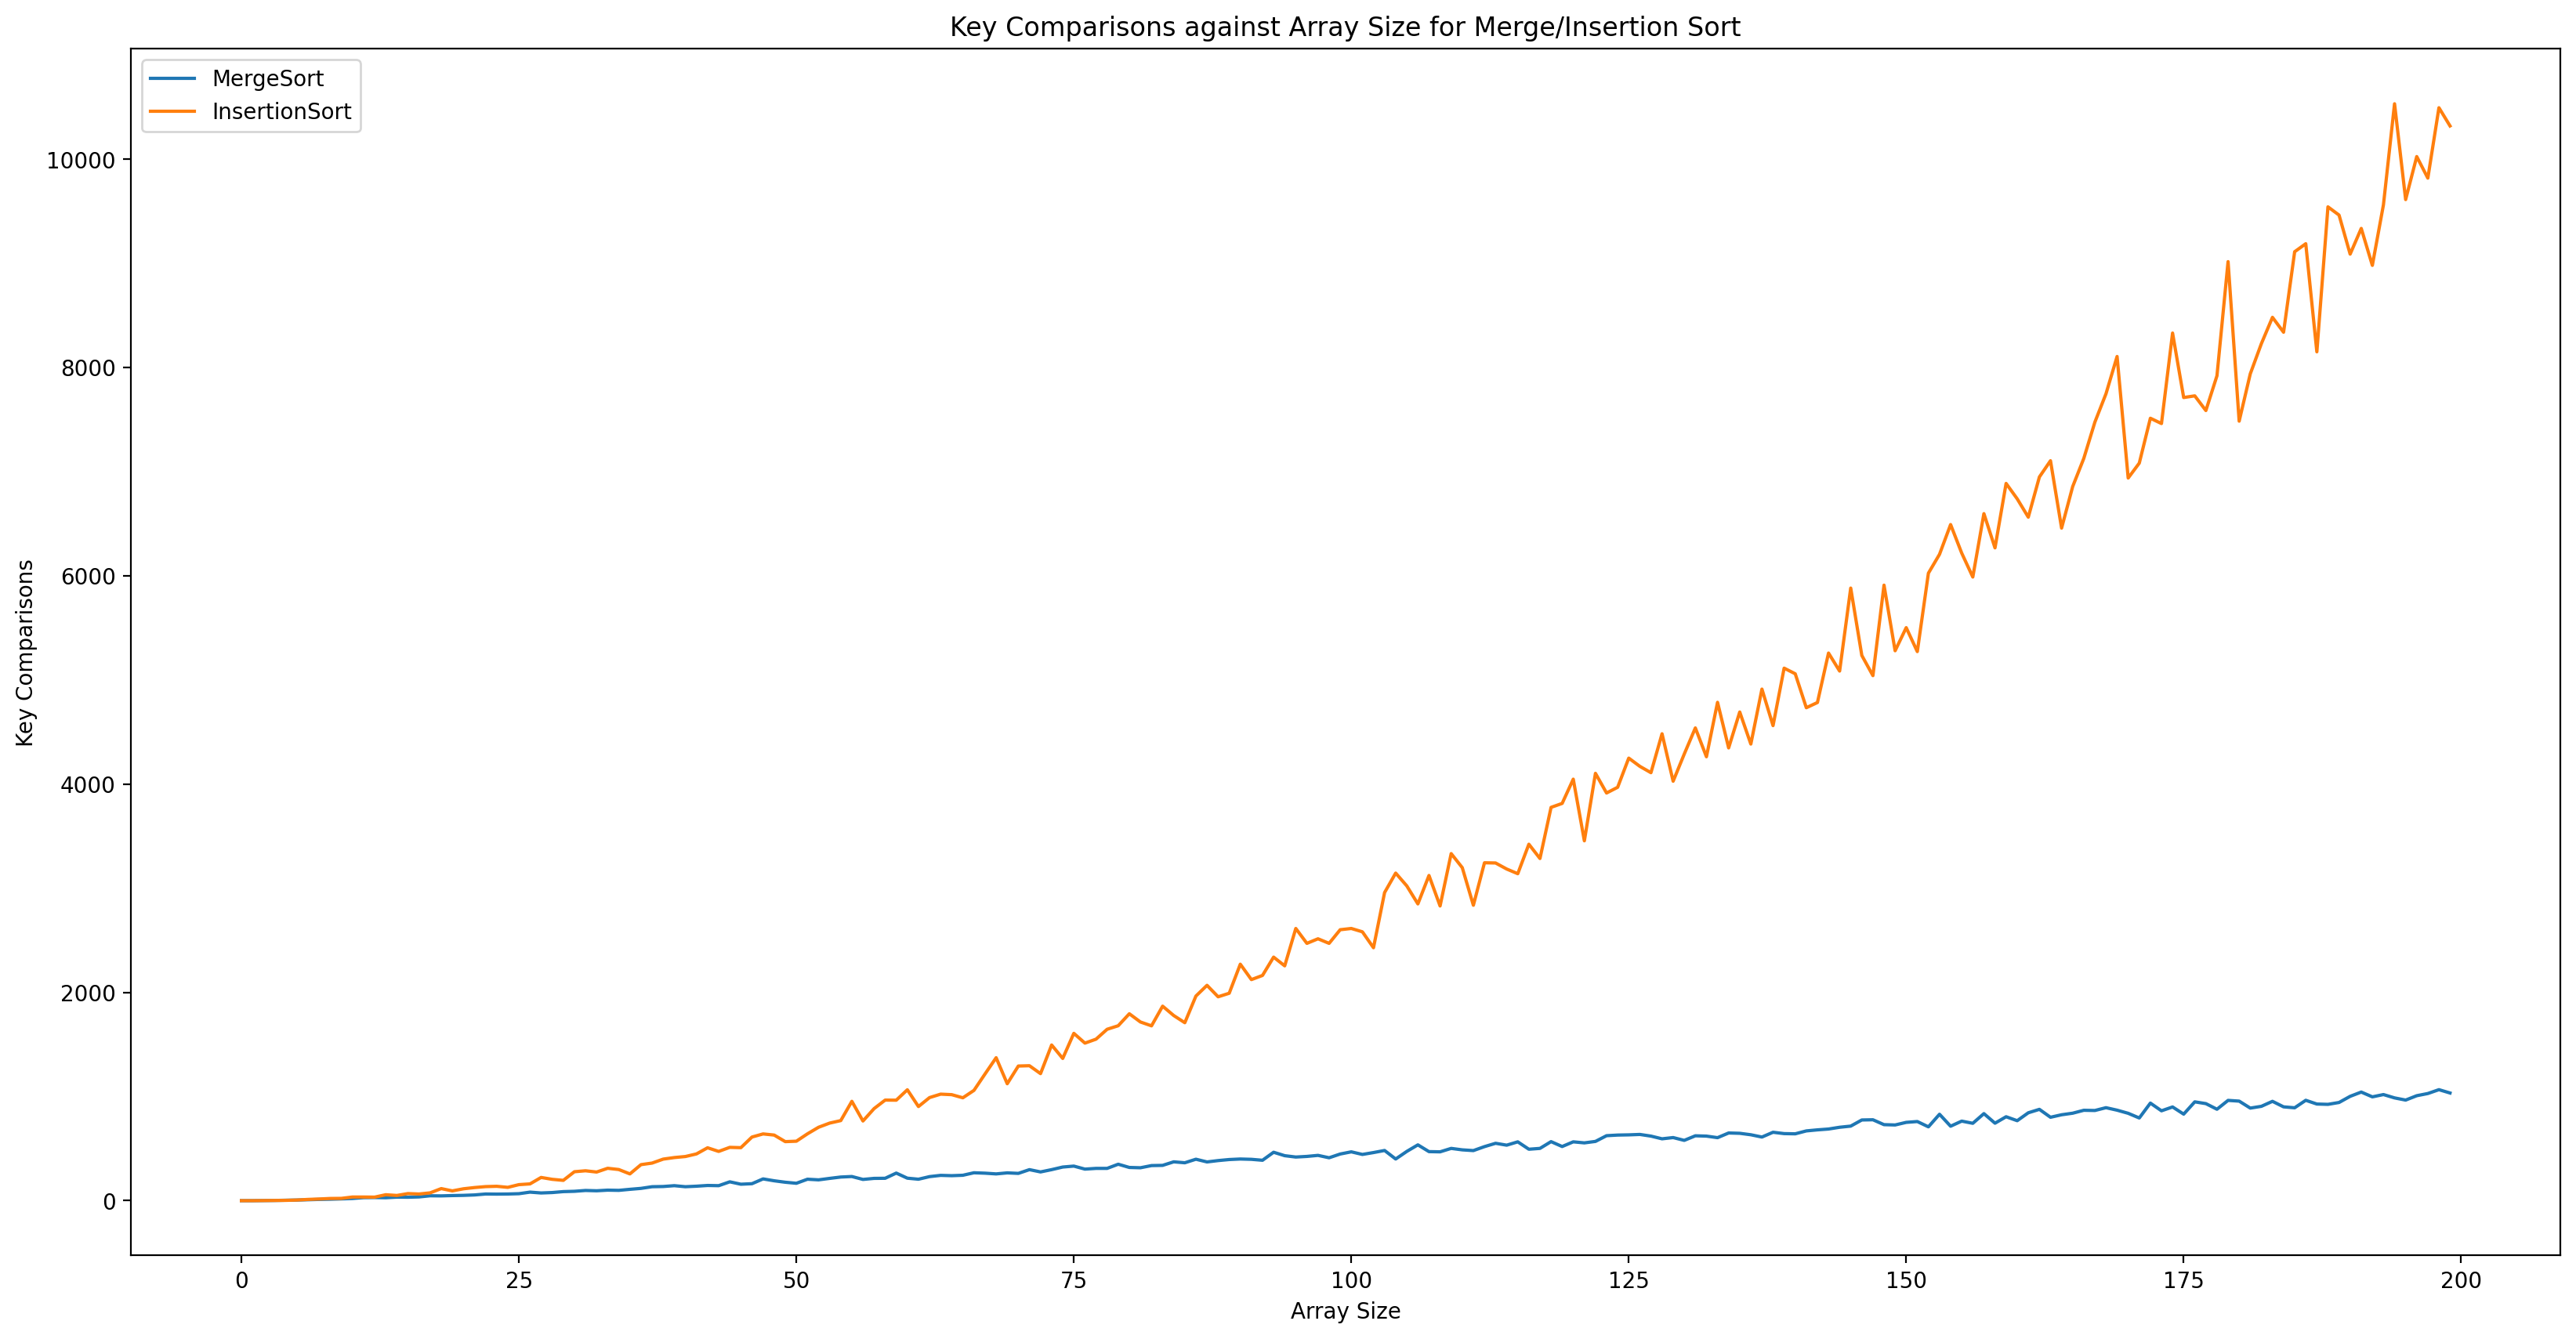

Optimal S is: 4


In [7]:
# Setup for Graph Plotting
plt.figure(figsize=(20, 10))
# Actual Plots
plt.plot(arrSize, mergeCompare, label="MergeSort")
plt.plot(arrSize, insertionCompare, label="InsertionSort")
# Graph Labels
plt.xlabel("Array Size")
plt.ylabel("Key Comparisons")
plt.title("Key Comparisons against Array Size for Merge/Insertion Sort")
plt.legend()
plt.show()
# Print out the Optimal S value.
print("Optimal S is:", optS)

# (d) Compare with Original Mergesort: Compare mergesort performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. Use the optimal value of S obtained in (c) for this task

In [9]:
# Assume all required libraries (time, numpy, copy, etc.) are already imported
np.random.seed(42)
size = int(1e8)  # Convert float to int for clarity

input_data = np.random.randint(1, size + 1, size)

In [ ]:
# Reset and run Hybrid Sort
comparison_counter.reset_count()
start_time = time.time()
hybrid_sort(deepcopy(input_data), comparison_counter, 4)
end_time = time.time()
hybrid_time = end_time - start_time
hybrid_comparisons = comparison_counter.get_count()

print(f"Hybrid Sort Key Comparisons: {hybrid_comparisons}")
print(f"Hybrid Sort Time: {hybrid_time:.2f} seconds")

# Reset and run Merge Sort
comparison_counter.reset_count()
start_time = time.time()
merge_sort(deepcopy(input_data), comparison_counter, 4)
end_time = time.time()
merge_time = end_time - start_time
merge_comparisons = comparison_counter.get_count()

print(f"Merge Sort Key Comparisons: {merge_comparisons}")
print(f"Merge Sort Time: {merge_time:.2f} seconds")